# Summary

In this scenario, you own a shop that sells harnesses for avalanche-rescue dogs, and you’ve recently expanded to also sell doggy boots. Customers all seem to pick the correct harness sizes, but are constantly ordering doggy boots that are the wrong size. You know most customers buy harnesses and boots in the same transaction, which gives you an idea: perhaps you could approximate which doggy boots are the correct size, depending on the harness chosen. Then, you could warn customers if the boots they have selected are likely to be the correct size before they make the purchase.

https://learn.microsoft.com/en-us/training/modules/introduction-to-machine-learning/

In [3]:
#!python -m wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/graphing.py
#!python -m wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/doggy-boot-harness.csv
import pandas

In [4]:


# Make a dictionary of data for boot sizes
# and harness size in cm
data = {
    'boot_size' : [ 39, 38, 37, 39, 38, 35, 37, 36, 35, 40, 
                    40, 36, 38, 39, 42, 42, 36, 36, 35, 41, 
                    42, 38, 37, 35, 40, 36, 35, 39, 41, 37, 
                    35, 41, 39, 41, 42, 42, 36, 37, 37, 39,
                    42, 35, 36, 41, 41, 41, 39, 39, 35, 39
 ],
    'harness_size': [ 58, 58, 52, 58, 57, 52, 55, 53, 49, 54,
                59, 56, 53, 58, 57, 58, 56, 51, 50, 59,
                59, 59, 55, 50, 55, 52, 53, 54, 61, 56,
                55, 60, 57, 56, 61, 58, 53, 57, 57, 55,
                60, 51, 52, 56, 55, 57, 58, 57, 51, 59
                ]
}

# Convert it into a table using pandas
dataset = pandas.DataFrame(data)

# Print the data
# In normal python we would write
# print(dataset)
# but in Jupyter notebooks, if we simple write the name
# of the variable and it is printed nicely 
dataset

,boot_size,harness_size
0,39,58
1,38,58
2,37,52
3,39,58
4,38,57
5,35,52
6,37,55
7,36,53
8,35,49
9,40,54


# Select a model

### Check the below link for extra information for the model

[Interpreting linear regression](https://medium.com/swlh/interpreting-linear-regression-through-statsmodels-summary-4796d359035a)

In [5]:
# Load a library to do the hard work for us
import statsmodels.formula.api as smf

# First, we define our formula using a special syntax
# This says that boot_size is explained by harness_size
formula = "boot_size ~ harness_size"

# Create the model using ordinary least squares, but don't train it yet
model = smf.ols(formula = formula, data = dataset)

# Note that we have created our model but it does not 
# have internal parameters set yet
if not hasattr(model, 'params'):
    print("Model selected but it does not have parameters set. We need to train it!")

Model selected but it does not have parameters set. We need to train it!


# Train the model

In [10]:
# Load some libraries to do the hard work for us
import graphing 

# Train (fit) the model so that it creates a line that 
# fits our data. This method does the hard work for
# us. We will look at how this method works in a later unit.
fitted_model = model.fit()

# Print information about our model now it has been fit
print("The following model parameters have been found:\n" +
        f"Line slope: {fitted_model.params[1]}\n"+
        f"Line Intercept (trendline offset along y): {fitted_model.params[0]}")

The following model parameters have been found:
Line slope: 0.585925416738271
Line Intercept: 5.719109812682598


In [11]:
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              boot_size   R-squared:                       0.569
Model:                            OLS   Adj. R-squared:                  0.560
Method:                 Least Squares   F-statistic:                     63.37
Date:                Mon, 03 Apr 2023   Prob (F-statistic):           2.53e-10
Time:                        16:09:29   Log-Likelihood:                -93.054
No. Observations:                  50   AIC:                             190.1
Df Residuals:                      48   BIC:                             193.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        5.7191      4.102      1.394      0.170      -2.528      13.966
harness_size     0.5859      0.074      7.960      0.000       0.438       0.734
==============================================================================
Omnibus:                        2.715   Durbin-Watson:                   1.717
Prob(Omnibus):                  0.257   Jarque-Bera (JB):                1.758
Skew:                           0.228   Prob(JB):                        0.415
Kurtosis:                       2.203   Cond. No.                     1.02e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.02e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
# Show a graph of the result
# Don't worry about how this works for now
graphing.scatter_2D(dataset,    label_x="harness_size", 
                                label_y="boot_size",
                                trendline=lambda x: fitted_model.params[1] * x + fitted_model.params[0]
                                )

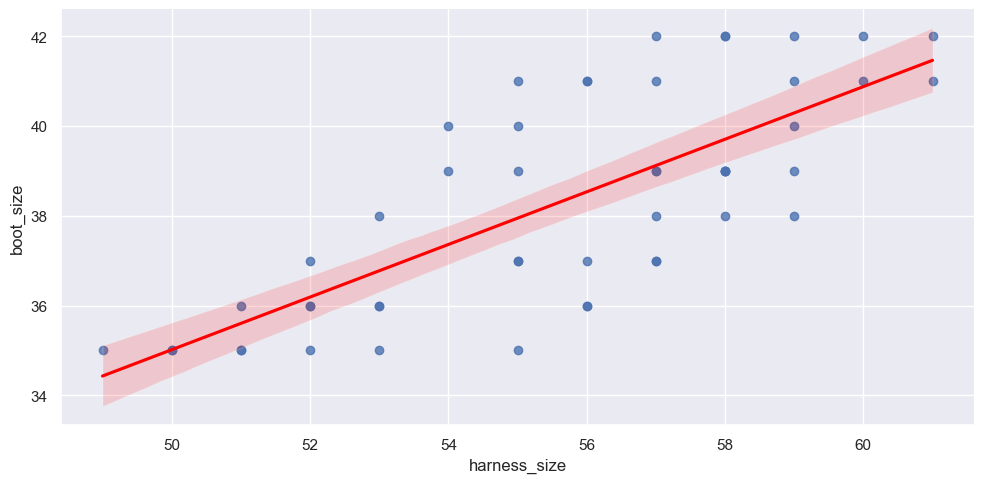

In [32]:
# Additional plot to compare smf.ols with seaborn linear regression
import seaborn as sns
#sns.set(rc={'figure.figsize':(11.7,2.27)})
sns.lmplot(x='harness_size',y='boot_size',data=dataset.reset_index(), line_kws={'color':'red'}, aspect=2)

# Use the model

In [33]:
# harness_size states the size of the harness we are interested in
harness_size = { 'harness_size' : [52.5] }

# Use the model to predict what size of boots the dog will fit
approximate_boot_size = fitted_model.predict(harness_size)

# Print the result
print("Estimated approximate_boot_size:")
print(approximate_boot_size[0])

Estimated approximate_boot_size:
36.480194191441825


# This time, use a .csv file instead of hardcoding the data

In [45]:
dataset = pandas.read_csv('doggy-boot-harness.csv')
dataset.head()


,boot_size,harness_size,sex,age_years
0,39,58,male,12.0
1,38,58,male,9.6
2,37,52,female,8.6
3,39,58,male,10.2
4,38,57,male,7.8


In [46]:
dataset.drop(["sex","age_years"], axis = 1, inplace=True)
print(dataset.columns.values)
dataset.head()

['boot_size' 'harness_size']


,boot_size,harness_size
0,39,58
1,38,58
2,37,52
3,39,58
4,38,57


In [50]:
data_smaller_paws = dataset[dataset['boot_size'] < 40].copy()
data_smaller_paws.head()

,boot_size,harness_size
0,39,58
1,38,58
2,37,52
3,39,58
4,38,57


In [53]:
import plotly.express
plotly.express.scatter(dataset, x="harness_size", y="boot_size")
#plotly.express.scatter(data_smaller_paws, x="harness_size", y="boot_size")

# How to use a model

When we use our model, we only need the column(s) of data that the model accepts as input. These columns are called **features**. In our scenario, if our model accepts harness size and estimates boot size, then our feature is harness size.

During training, the objective function usually needs to know both the model’s output and what the correct answer was. These are called **labels**. In our scenario, if our model predicts boot size, boot size is our label.

Taken together, this means that to use a model, we only ever need **features**, while during training we usually need both **features** and **labels**.

# Exercise: Using a Trained Model on New Data

 **Some code parts repeats itself but has been put for documentation purpose.**

In [55]:
print(fitted_model.summary())

                            OLS Regression Results                            
Dep. Variable:              boot_size   R-squared:                       0.569
Model:                            OLS   Adj. R-squared:                  0.560
Method:                 Least Squares   F-statistic:                     63.37
Date:                Mon, 03 Apr 2023   Prob (F-statistic):           2.53e-10
Time:                        17:04:47   Log-Likelihood:                -93.054
No. Observations:                  50   AIC:                             190.1
Df Residuals:                      48   BIC:                             193.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        5.7191      4.102      1.394   

In [57]:
import joblib
model_filename = './avalanche_dog_boot_model.pkl'
joblib.dump(fitted_model, model_filename)

print("Model saved!")

Model saved!


In [58]:
model_loaded = joblib.load(model_filename)

print("We have loaded a model with the following parameters:")
print(model_loaded.params)

We have loaded a model with the following parameters:
Intercept       5.719110
harness_size    0.585925
dtype: float64


In [61]:
# Let's write a function that loads and uses our model
def load_model_and_predict(harness_size):
    '''
    This function loads a pretrained model. It uses the model
    with the customer's dog's harness size to predict the size of
    boots that will fit that dog.

    harness_size: The dog harness size, in cm 
    '''

    # Load the model from file and print basic information about it
    loaded_model = joblib.load(model_filename)

    print("We've loaded a model with the following parameters:")
    print(loaded_model.params)

    # Prepare data for the model
    inputs = {"harness_size":[harness_size]} 

    # Use the model to make a prediction
    predicted_boot_size = loaded_model.predict(inputs)[0]

    return predicted_boot_size

# Practice using our model
predicted_boot_size = load_model_and_predict(45)

print(f"Predicted dog boot size {predicted_boot_size}:")

We've loaded a model with the following parameters:
Intercept       5.719110
harness_size    0.585925
dtype: float64
Predicted dog boot size 32.085753565904795:


**A real use case, to tidy it up**

In [62]:
def check_size_of_boots(selected_harness_size, selected_boot_size):
    """Calculates whether the customer has chosen a pair of doggy boots that are a sensible size. 
    This works by estimating the dog's actual boot size from their harness size. This returns a message for 
    the customer that should be shown before they complete their payment selected_harness_size: The size of 
    the harness the customer wants to buy selected_boot_size: The size of the doggy boots the customer wants to buy
    """

    # Estimate the customer's dog's boot size
    estimated_boot_size = load_model_and_predict(selected_harness_size)

    # Round to the nearest whole number because we don't sell partial sizes
    estimated_boot_size = int(round(estimated_boot_size))

    # Check if the boot size selected is appropriate
    if selected_boot_size == estimated_boot_size:
        # The selected boots are probably OK
        return f"Great choice! We think these boots will fit your avalanche dog well."

    if selected_boot_size < estimated_boot_size:
        # Selected boots might be too small 
        return "The boots you have selected might be TOO SMALL for a dog as "\
               f"big as yours. We recommend a doggy boots size of {estimated_boot_size}."

    if selected_boot_size > estimated_boot_size:
        # Selected boots might be too big 
        return "The boots you have selected might be TOO BIG for a dog as "\
               f"small as yours. We recommend a doggy boots size of {estimated_boot_size}."
    

# Practice using our new warning system
check_size_of_boots(selected_harness_size=55, selected_boot_size=39)

We've loaded a model with the following parameters:
Intercept       5.719110
harness_size    0.585925
dtype: float64


'The boots you have selected might be TOO BIG for a dog as small as yours. We recommend a doggy boots size of 38.'